<a href="https://colab.research.google.com/github/tlyonsWIT/Mathematical-Methods/blob/main/Mathematical%20Methods%20-%20Workbook%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematical Methods - Python Workbook 6

## B Sc (H) Applied Computing - Year 2  

# South East Technological University - Waterford

---
 

# Topic 3 - Matrices, eigenvalues and eigenvectors

## Items Covered:

1. The __eigenvalues__ of $3\times3$ matrices

2. The __eigenvectors__ of $3\times3$ matrices

3. The __exponential__ of $2\times2$ matrices


## Calling the python libraries and functions


* In the cell below the necessary Python libraries and functions are imported, which will be needed for the current work book


In [ ]:
import matplotlib.pyplot as plt  ## Library of functions for 2D plotting
import numpy as np ## Library of function for numerical work

from mpl_toolkits.mplot3d import Axes3D # Import the functions for creating 3D plots

from ipywidgets import widgets, interact, interactive, fixed, interact_manual # Import widgets for interactive plots
from IPython.display import clear_output # A function to clear interactive plots before each update

from matplotlib import animation # A function to create an animation
from IPython.display import HTML # For creating HTML animation whcih can be displayed directly in the browser / Colab notebook

from scipy.linalg import eig  # Import the scipy function for calculating eigenvalues and eigenvectors

## Some useful function definitions

### __v2d(a,b)__

* A function for creating 2D-vectors

In [ ]:
def v2d(a,b):
    return np.array([a,b])

### __M2(a,b,c,d)__
A function to create a __2x2 matrix__ of the form
$$
\begin{bmatrix}
a & b \\ c & d
\end{bmatrix}
$$

In [ ]:
def M2(a,b,c,d):
    return np.array([[a,b],[c,d]])

### __M3(a,b,c,d,e,f,g,h,i)__
A function to create a __3x3 matrix__ of the form
$$
\begin{bmatrix}
a & b & c\\ d & e & f \\ g & h & i
\end{bmatrix}
$$

In [ ]:
def M3(a,b,c,d,e,f,g,h,i):
    return np.array([[a , b, c] , [d , e , f] , [g , h, i]])

__norm(u)__

A function to calculate the norm of a 2D vector $\vec{u}$

In [ ]:
def norm(u):
    return np.sqrt(u.dot(u))

# Item 2 - Eigenvalues of a matrix

* Given a matrix
$$
\mathbf{M} = 
\begin{bmatrix}
 a & b & c\\ d & e & f \\ g & h & i
\end{bmatrix}
$$
the __characteristic polynomial (C.P.)__ of this matrix is given by the determinant
$$
p(\lambda) = 
\begin{Vmatrix}
 a - \lambda & b & c\\ d & e - \lambda & f \\ g & h & i - \lambda
\end{Vmatrix}
$$

\\

* The __eigenvalues__ of the matrix $M$ are the roots of this polynomial, i.e. the solutions of $p(\lambda) = 0$

\\

* While __numpy__ does not deal directly with symbolic representations of polynomials, we can still use the function __np.poly()__ to construct the characteristic polynomial of a matrix in terms of the coefficients of that polynomial

## __Example__ 1

__i)__ Given the matrix
$$
J = 
\begin{bmatrix}
 2 & -4 & 5 \\ 3 & 5 & 7 \\ -2 & 4 & 3
\end{bmatrix}
$$
find the characteristic ploynomial of __J__ using the function __np.poly()__



__ii)__ Now use the function __np.solve()__ to find the solutions of this polynomial, in other words you will also find the __eigenvalues__ of __J__

\\



### __Solution__

__i)__  First we define the matrix __J__ using the function __M2()__

In [ ]:
J = M3(2, -4, 5, 3 , 5, 7, -2, 4, 3)
J

array([[ 2, -4,  5],
       [ 3,  5,  7],
       [-2,  4,  3]])

* The __coefficients__ of the characteristic polynomial are now given by 

In [ ]:
PJ = np.poly(J)
PJ

array([   1.,  -10.,   25., -176.])

__NOTE:__ This means the characteristic polynomial of __J__ is a __cubic__ polynomial given by
$$
1\lambda^3 - 10 \lambda^2 + 25\lambda - 176 = 0
$$

__ii)__ __Every__ cubic polynomial always has at least one real root. 

If it has complex roots, then it will have __two__ complex roots which are __complex cougates__ 

In the case of the polynomial __PJ__ above, we see that its roos one real and 2 complex conjugates, as shown below:

In [ ]:
np.roots(PJ)

array([9.34075556+0.j        , 0.32962222+4.32822227j,
       0.32962222-4.32822227j])

## _Exercise_ 1

Given the matrix
$$
\mathbf{K} 
= 
\begin{bmatrix}
1 & 0 & 1 \\ 0 & 2 & 0 \\ -1 & 0 & 1
\end{bmatrix}
$$
answer the following:

__i)__ Use the function __M3()__ to define the matrix __K__ above

__ii)__ Find the __characteristic polynomial__ of __K__

__iii)__ Find the roots of this characteristic polynomial i.e. the eigenvalues of __K__


---

# Item 2 - Eigenvectors of a Matrix

* While __np.poly()__ and __np.roots()__ are useful functions when we are looking for the eigenvalues of a matrix, they are not helpful when we want the corresponding eigenvectors

\\

* The __eigenvalues__ and __eigenvectors__ of a matrix can all be calculated directly using the __scipy__ (__sci__entific __py__thon) function __eig()__

\\

* This function will calculate the eigenvalues and eigenvectors in one large array, so the important thing to understand is how to extract each of them separately using the __index [ ]__ of the output

## __Example__ 2

Given the matrix
$$
\mathbf{H} = 
\begin{bmatrix}
4 & 1 & 5 \\ 2 & 5 & -8 \\ 2 & -5 & 3
\end{bmatrix}
$$
answer the following:

__i)__ Use the function __M3()__ to create this matrix


__ii)__ Use the function __eig()__ to find the eigenvalues and eigenvectors of the matrix $\mathbf{H}$

__iii)__ Use the index notation __[ ]__ to extract each of the eigenvalues and eigenvectors separately. Check that the eigenvectors have __norm__ 1, these are called __normalized eigenvectors__


__iv)__ Check the __truth values__ of the equations 
$$
\mathbf{H}.\vec{u} = \lambda\vec{u}
$$
for each of the eigenvalues and corresponding eigenvectors


__v)__ Plot each of the eigenvectors $\vec{u}$, $\vec{v}$ and $\vec{w}$ and the vectors $\mathbf{H}.\vec{u}$,  $\mathbf{H}.\vec{v}$ and $\mathbf{H}.\vec{w}$ using __ax.quiver()__

### __Solution__

__i)__ The matrix is given by

In [ ]:
H = M3(4, 1, 5, 2, 5, -8, 2, -5, 3)
H

array([[ 4,  1,  5],
       [ 2,  5, -8],
       [ 2, -5,  3]])

__ii)__ The eigenvalues and eigenvectors are given by

In [ ]:
EH=eig(H)
EH

(array([-3.89747336+0.j,  5.45425558+0.j, 10.44321777+0.j]),
 array([[-0.4644597 ,  0.9382232 ,  0.34027819],
        [ 0.64756653,  0.26761616, -0.73569133],
        [ 0.60409832,  0.21936003,  0.58563557]]))

__iii)__

* We see that we have an array of arrays.


* The __first array__ is the list of __eigenvalues__, which we extract as follows

In [ ]:
EH[0]

array([-3.89747336+0.j,  5.45425558+0.j, 10.44321777+0.j])

* We can extract the individual eigenvalues as follows

In [ ]:
l1,l2,l3=EH[0]

In [ ]:
l1

(-3.897473357052201+0j)

In [ ]:
l2

(5.454255583992018+0j)

In [ ]:
l3

(10.443217773060182+0j)

* The __second array__ is the __eigenvector__ corresponding to __l1__ and is extracted as follows

In [ ]:
u=EH[1][:,0]
u

array([-0.4644597 ,  0.64756653,  0.60409832])

* The remaining __eigenvectors__ corresponding to the eigenvalues __l2 & l3__ are similarly given by

In [ ]:
v=EH[1][:,1]
v

array([0.9382232 , 0.26761616, 0.21936003])

In [ ]:
w=EH[1][:,2]
w

array([ 0.34027819, -0.73569133,  0.58563557])

* The norms of these eigenvectors are 

In [ ]:
norm(u) ,norm(v), norm(w)

(1.0, 1.0, 0.9999999999999999)

* The function __eig()__ always returns normalised eigenvectors  

__iv)__ We check the eigenvalue equations are true using __==__

In [ ]:
np.round(H.dot(u),6)== np.round(l1*u,6)

array([ True,  True,  True])

In [ ]:
np.round(H.dot(v),6)== np.round(l2*v,6)

array([ True,  True,  True])

In [ ]:
np.round(H.dot(w),6)== np.round(l3*w,6)

array([ True,  True,  True])

__NOTE__ We have to wrap each term in the __np.round()__ function to ensure we get the correct truth values!!

__v)__ 

* To make things easier to type we will use the following notation

In [ ]:
Hu=H.dot(u)
Hv=H.dot(v)
Hw=H.dot(w)

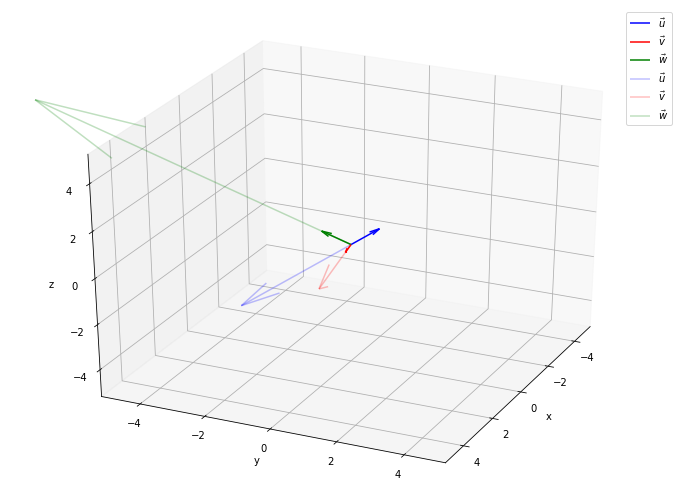

In [ ]:
fig = plt.figure(figsize=(12,9)) # Create a figure environment we call fig, make it 12" x 9" in size
ax = fig.gca(projection='3d') # Create 3D axes in this figure and call these axes ax

# The command for plotting 3D vectors is similar, we just use ax.quiver() instead of plt.quiver()
ax.quiver(0,0,0,u[0],u[1],u[2],color='b',label='$\\vec{u}$')
ax.quiver(0,0,0,v[0],v[1],v[2],color='r',label='$\\vec{v}$')
ax.quiver(0,0,0,w[0],w[1],w[2],color='g',label='$\\vec{w}$')

ax.quiver(0,0,0,Hu[0],Hu[1],Hu[2],color='b',label='$\\vec{u}$',alpha=0.25)
ax.quiver(0,0,0,Hv[0],Hv[1],Hv[2],color='r',label='$\\vec{v}$',alpha=0.25)
ax.quiver(0,0,0,Hw[0],Hw[1],Hw[2],color='g',label='$\\vec{w}$',alpha=0.25)

# Setting the axis-labels is slightly different, we must use ax.set_xlabel() etc.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Setting the axis-limits is also slightly different, we must use ax.set_xlim() etc.
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

ax.view_init(elev=30, azim = 25)

ax.legend()

* As we can see from the plot, __H__ just stretches the eigenvectors __v__ and __w__ as expected

* However __H__ also __reverses__ and stretches the eigenvector __u__ 

## _Exercise_ 2

Given the matrix
$$
\mathbf{U} = 
\begin{bmatrix}
3 & 1 & 4 \\ 1 & 5 & 4 \\ 2 & 5 & 7
\end{bmatrix}
$$
answer the following:

__i)__ Use the function __M3()__ to create this matrix


__ii)__ Use the function __eig()__ to find the eigenvalues and eigenvectors of the matrix $\mathbf{U}$

__iii)__ Use the index notation __[ ]__ to extract each of the eigenvalues and eigenvectors separately. 


__iv)__ Check the __truth values__ of the equations 
$$
\mathbf{U}.\vec{u} = \lambda\vec{u}
$$
for each of the eigenvalues and corresponding eigenvectors


__v)__ Plot each of the eigenvectors $\vec{u}$, $\vec{v}$ and $\vec{w}$ and the vectors $\mathbf{U}.\vec{u}$, $\mathbf{U}.\vec{v}$ and $\mathbf{U}.\vec{w}$  using __ax.quiver()__

In [ ]:
U = M3(3, 1, 4, 1, 5, 4, 2, 5, 7)
U

array([[3, 1, 4],
       [1, 5, 4],
       [2, 5, 7]])

In [ ]:
eig(U)

(array([11.56186799+0.j,  2.55955179+0.j,  0.87858022+0.j]),
 array([[-0.41074917, -0.93207228, -0.81279739],
        [-0.51938612,  0.36206975, -0.29201041],
        [-0.7493485 ,  0.01211495,  0.50407372]]))

---

# Item 3 - Exponential of a matrix

* As we have seen in lectures, we can take the exponential of a matrix by using the __Taylor series__ for $e^{x}$ and substituting our matrix $A$ for $x$.


* This requires us writing the matrix $A$ in diagonal form
\begin{equation*}
A = 
\begin{bmatrix}
u_{1} & v_{1} \\
u_{2} & v_{2}
\end{bmatrix}
\begin{bmatrix}
\lambda_{1} & 0 \\
0 & \lambda_{2}
\end{bmatrix}
\begin{bmatrix}
u_{1} & v_{1} \\
u_{2} & v_{2}
\end{bmatrix}^{-1}
\end{equation*}

* The diagonalisation matrix 
$$
P = \begin{bmatrix}
u_{1} & v_{1} \\
u_{2} & v_{2}
\end{bmatrix}
$$
is formed from the eigenvectors 
$$
\vec{u} 
= 
\begin{bmatrix}
u_{1} \\ u_{2}
\end{bmatrix}
\qquad
\vec{v} 
= 
\begin{bmatrix}
v_{1} \\ v_{2}
\end{bmatrix}
$$
where 
$$
A\vec{u} = \lambda_{1}\vec{u} \qquad A\vec{v} = \lambda_{2}\vec{v}
$$

* The __exponential__ of $A$ can then be written as 
\begin{equation*}
e^A = 
\begin{bmatrix}
u_{1} & v_{1} \\
u_{2} & v_{2}
\end{bmatrix}
\begin{bmatrix}
e^{\lambda_{1}} & 0 \\
0 & e^{\lambda_{2}}
\end{bmatrix}
\begin{bmatrix}
u_{1} & v_{1} \\
u_{2} & v_{2}
\end{bmatrix}^{-1}
\end{equation*}


* The exponential of a matrix can be calcuated with the __expm()__ function from the __scipy.linalg__ library, which we import below

In [ ]:
from scipy.linalg import expm

## __Example__ 3

* Given the matrix
$$
A = 
\begin{bmatrix}
-5 & 6 \\ 2 & 7
\end{bmatrix}
$$
calculate the matrix exponential $e^{A}$. 

In [ ]:
A=M2(-5,6,2,7)
A

array([[-5,  6],
       [ 2,  7]])

In [ ]:
expm(A)

array([[ 185.85454325, 1201.36543759],
       [ 400.45514586, 2588.58541844]])

## _Exercise_ 3

__i)__ Given the matrix
$$
S = 
\begin{bmatrix}
0 & -1 \\ 1 & 0
\end{bmatrix}
$$
calculate the matrix exponential $e^{S}$.

__Note__ This is an important matrix in __Quantum Mechanics__ where is describes the spin of the electron about the $z$-axis of a coordinate frame

It also has the important application of __generating__ rotations about the $z$-axis

This means that the matrix $e^{0.25S}$ will rotate a vector by 0.25 radians about the $z$-axis for example

We do not need to go to 3-dimesions to see this working, since the rotations take place in the $(x,y)$-plane

__ii)__ Now calculate the matrix exponential given by
$$
R = e^{0.7854 S}
$$


__iii)__ Given the vectors 
$$
\vec{u} = 
\begin{bmatrix}
0 \\ 2
\end{bmatrix}
\qquad 
\vec{v} = 
\begin{bmatrix}
3 \\ 2
\end{bmatrix}
$$
plot $\vec{u}$, $\vec{v}$, $R\vec{u}$ and $R\vec{v}$ using __plt.quiver()__